# DAB 303 Project 1

## Churn Prediction Analysis Part 1

### Group S2 - 2
- Alfred George (W0783363)
- Deepa Taneja Chawla (W0774178)
- NikulKumar Devataja (W0781660)
- Prathap David Carlo (W0787017)
- Rajesh Gandham (W0783532)

#### Q1. What is Churn Prediction analysis?

##### Answer 1

Customer loss rate in a company is called **churn**. Studying customer journey and churn data analysis allows prediction of liklihood of churn rate among the customers known as Churn Prediction analysis. This study aids organisations in determining the root reason of customer loss and developing successful customer retention strategies. When we combine financial KPIs with demographic data, we can identify client segments that should be targeted.

In [1]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.subplots as sp  #visualization
import plotly.figure_factory as ff#visualization
#from pycaret.utils import enable_colab
#enable_colab()

## Data Import
- Telecom Churn Data

In [2]:
#read data
telcom = pd.read_csv("Telco-Customer-Churn.csv")

## Data Overview

In [3]:
# display info,ration about colums, type, total number of values in each column
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# display number of rows and columns 
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
# see columns as a list
print ("\nFeatures : \n" ,telcom.columns.tolist())
# see how many unique values are in each column
print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [5]:
# see if columns has any nulls, this will not be able to inspect spaces
telcom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# replace any spaces with NAN
# and then view data 
telcom = telcom.replace(" ", np.NaN)
telcom.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [7]:
# see if columns has any nulls after replaving spaces
telcom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### "Total Charges" column has 11 null cells/values

# Data Cleaning

We will keep 20 input variables and 1 output variable (Churn) to create the model
- customerID (Char w/ 7043 levels "0002-ORFBO","0003-MKNFE",)
- gender (Factor w/ 2 levels "Female","Male")
- SeniorCitizen (int)
- Partner (Factor w/ 2 levels "No","Yes")
- Dependents (Factor w/ 2 levels "No","Yes")
- tenure (int)
- PhoneService (Factor w/ 2 levels "No","Yes")
- MultipleLines (Factor w/ 3 levels "No","No phone service",)
- InternetService (Factor w/ 3 levels "DSL","Fiber optic",)
- OnlineSecurity (Factor w/ 3 levels "No","No internet service",)
- OnlineBackup (Factor w/ 3 levels "No","No internet service",)
- DeviceProtection (Factor w/ 3 levels "No","No internet service",)
- TechSupport (Factor w/ 3 levels "No","No internet service",)
- StreamingTV (Factor w/ 3 levels "No","No internet service",)
- StreamingMovies (Factor w/ 3 levels "No","No internet service",)
- Contract (Factor w/ 3 levels "Month-to-month",)
- PaperlessBilling (Factor w/ 2 levels "No","Yes")
- PaymentMethod (Factor w/ 4 levels "Bank transfer (automatic)",)
- MonthlyCharges (num)
- TotalCharges (num)
- Churn (Factor w/ 2 levels "No","Yes")


In [8]:
missing_data = telcom.isnull()

In [9]:
# Count missing values
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

customerID
False    7043
Name: customerID, dtype: int64

gender
False    7043
Name: gender, dtype: int64

SeniorCitizen
False    7043
Name: SeniorCitizen, dtype: int64

Partner
False    7043
Name: Partner, dtype: int64

Dependents
False    7043
Name: Dependents, dtype: int64

tenure
False    7043
Name: tenure, dtype: int64

PhoneService
False    7043
Name: PhoneService, dtype: int64

MultipleLines
False    7043
Name: MultipleLines, dtype: int64

InternetService
False    7043
Name: InternetService, dtype: int64

OnlineSecurity
False    7043
Name: OnlineSecurity, dtype: int64

OnlineBackup
False    7043
Name: OnlineBackup, dtype: int64

DeviceProtection
False    7043
Name: DeviceProtection, dtype: int64

TechSupport
False    7043
Name: TechSupport, dtype: int64

StreamingTV
False    7043
Name: StreamingTV, dtype: int64

StreamingMovies
False    7043
Name: StreamingMovies, dtype: int64

Contract
False    7043
Name: Contract, dtype: int64

PaperlessBilling
False    7043
Name: PaperlessBill

#### Work with the Total Charges Column

In [10]:
#Dropping null values from total charges column which contain .15% missing data 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

In [11]:
#Replace 'No internet service' to 'No' for the following 6 columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})

In [12]:
#replace values in Senior Citizen column
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [13]:
# Convert Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"

telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [14]:
telcom.tenure_group.unique()

array(['Tenure_0-12', 'Tenure_24-48', 'Tenure_12-24', 'Tenure_gt_60',
       'Tenure_48-60'], dtype=object)

In [15]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


#### Dependent Variable or Variable of Interest is Churn

In [16]:
#Separating churn and non churn customers

churn     = telcom[telcom["Churn"] == "Yes"]
not_churn = telcom[telcom["Churn"] == "No"]

In [17]:
#print number of churn and not churn customers
print ('Customers who stayed', len(not_churn))
print ('Customers who left', len(churn))

Customers who stayed 5163
Customers who left 1869


### Separating catagorical and numerical columns

In [18]:
#Separating catagorical and numerical columns
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.keys().tolist()

In [19]:
#columns removing ID columns
cat_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'tenure_group']

In [20]:
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()

In [21]:
#print catagorical columns
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_group']

In [22]:
#Separating catagorical and numerical columns
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [23]:
Id_col

['customerID']

In [24]:
#print catagorical columns
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [25]:
#print catagorical columns
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

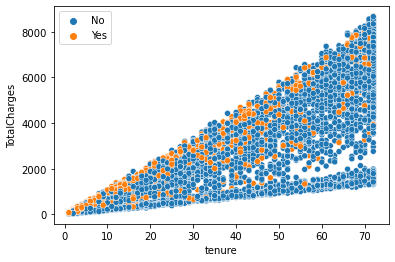

In [26]:
# Create a scatter plot

sns.scatterplot(data = telcom, x =telcom['tenure'], y = telcom['TotalCharges'], hue=telcom.Churn.tolist())

#### Q2.What does the above plot indicate?


##### Answer 2
##### The scatter plot is showing the relationship between two numeric columns, tenure and total charges. Total charges is related to tenure. There is a linear growth in total charges as the tenure length increases. It is also suggesting that churn can be seen in every tenure.
**Form :** Wide Linear
**Direction :** Positive
**Strength** : Weak
**Outliers :** Potential outliers, there is some gap towards high tenure length

##### In other words this scatterplot shows a weak, positive, linear association between tenure and totalcost in our churn data. There appears to be some outliers in the data.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

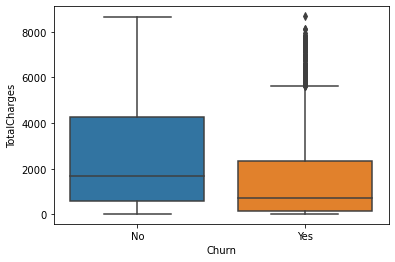

In [27]:
sns.boxplot(data= telcom, x="Churn", y="TotalCharges")

#### Q3 What does the above plot indicate?

##### Answer 3

##### In both churned and not churned data, the distance from the median to the maximum is greater than the distance from the median to the minimum, hence the plot is positively skewed.

The box plot is showing the distribution of our churn and not churned records in the dataset. Most of the customers have charges between 500 - 4000 and churn was higher mainly when the total charges were less than 2500. There are only few churns at higher charges. The average total charges among churners is below 1000. We do have some potential outliers.




# Exploratory Data Analysis
## Churn No-Churn Percentage
### You need to run the code below to create a Pie chart and understand the output

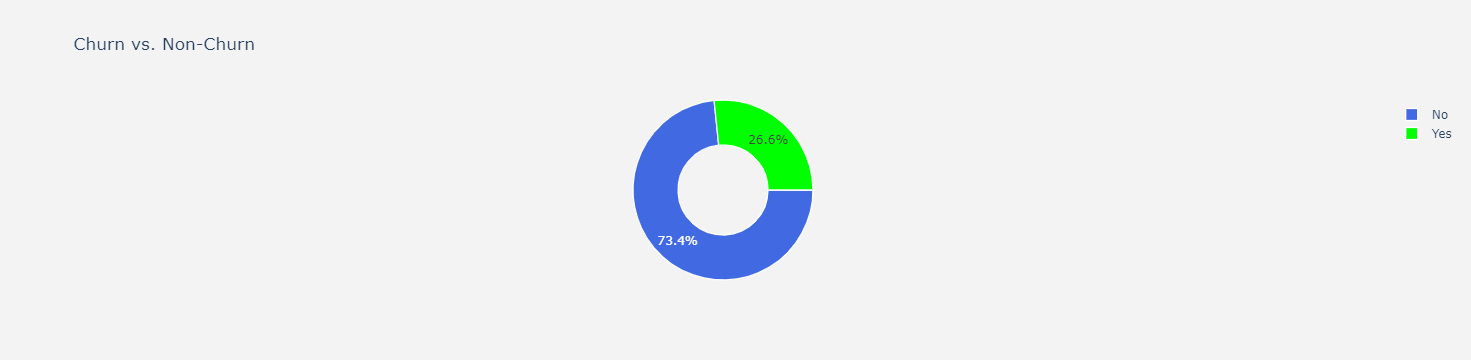

In [28]:
#labels
lab = telcom["Churn"].value_counts().keys().tolist()
#values
val = telcom["Churn"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Churn vs. Non-Churn",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)

py.iplot(fig)


#### Q4. Comment on this distribution
#### Answer 4: The pie chart illustrates that more than one fourth of the customers have left , our retention rate is 73.4% and our churn rate is 26.6%.

In [29]:
data

[Pie({
     'hole': 0.5,
     'hoverinfo': 'label+value+text',
     'labels': [No, Yes],
     'marker': {'colors': ['royalblue', 'lime'], 'line': {'color': 'white', 'width': 1.3}},
     'rotation': 90,
     'values': [5163, 1869]
 })]

In [30]:
telcom['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [31]:
# Save the cleaned file
telcom.to_csv('clean_df.csv')

## Varibles distribution in Churn and Non-churn category: Pie Charts for Categorical variables
### You need to run the code and understand the output

In [32]:
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 4,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = str.upper(column) + " Distribution in Customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "Churn Customers",
                                                font = dict(size = 12),
                                                showarrow = False,
                                                x = .19, y = .5),
                                           dict(text = "Non Churn Customers",
                                                font = dict(size = 12),
                                                showarrow = False,
                                                x = .83,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)

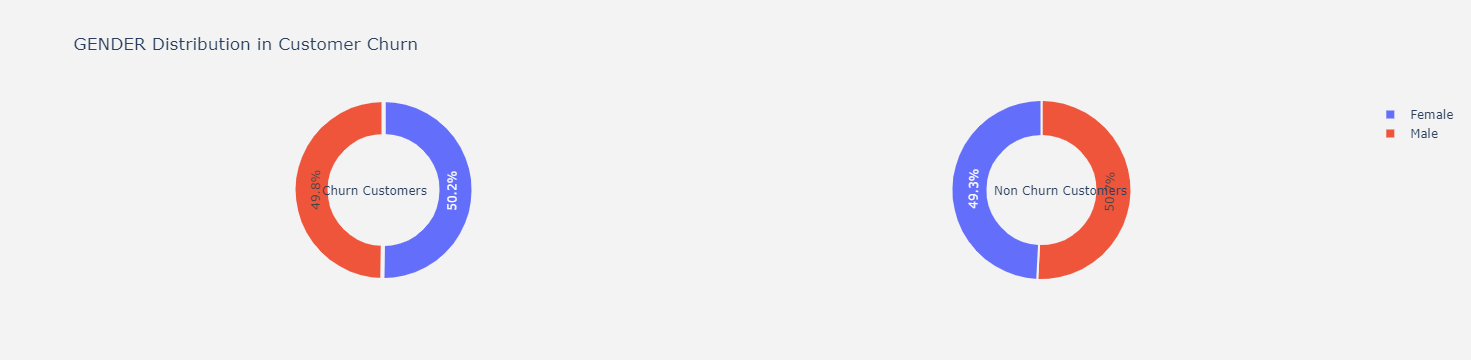

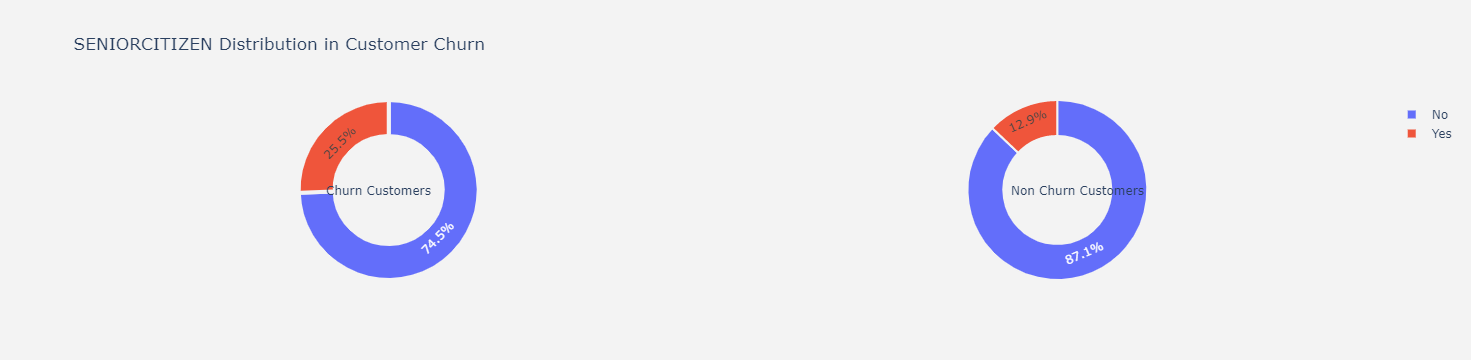

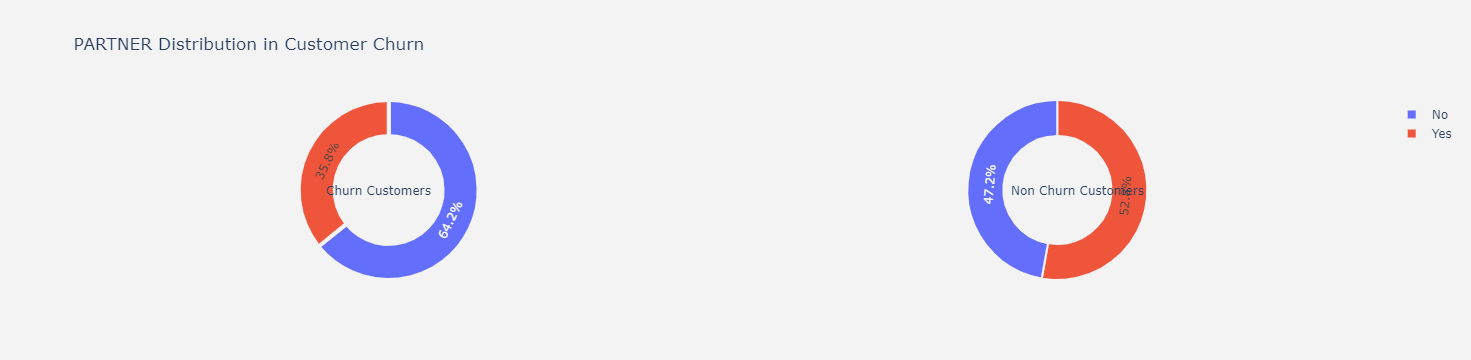

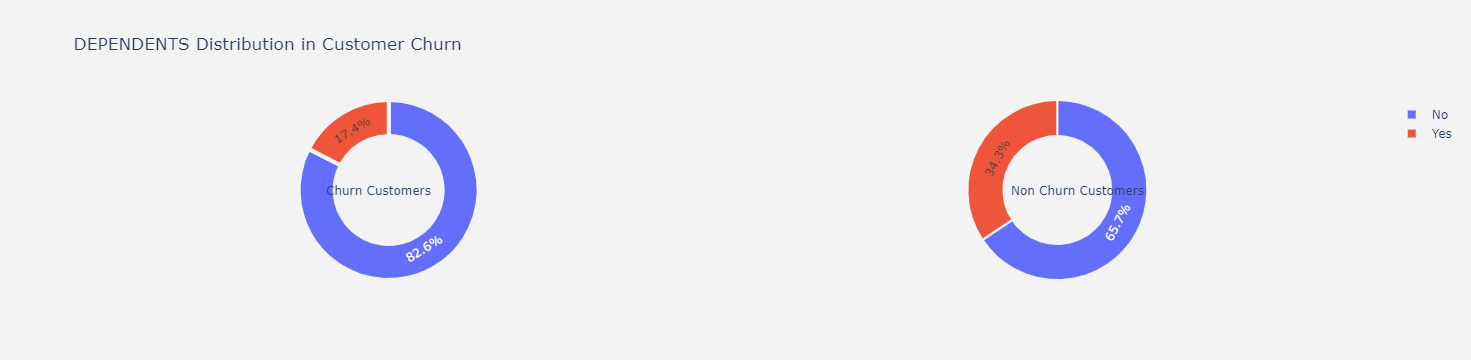

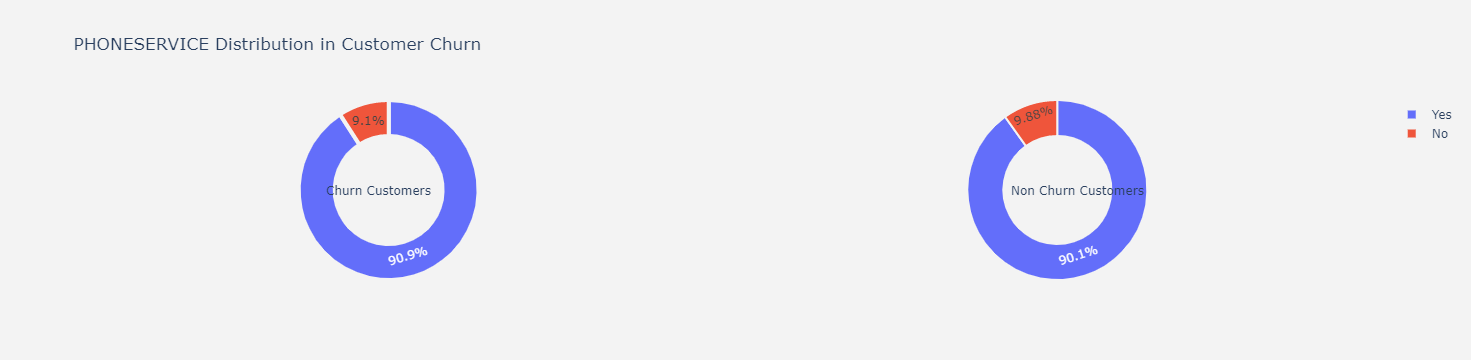

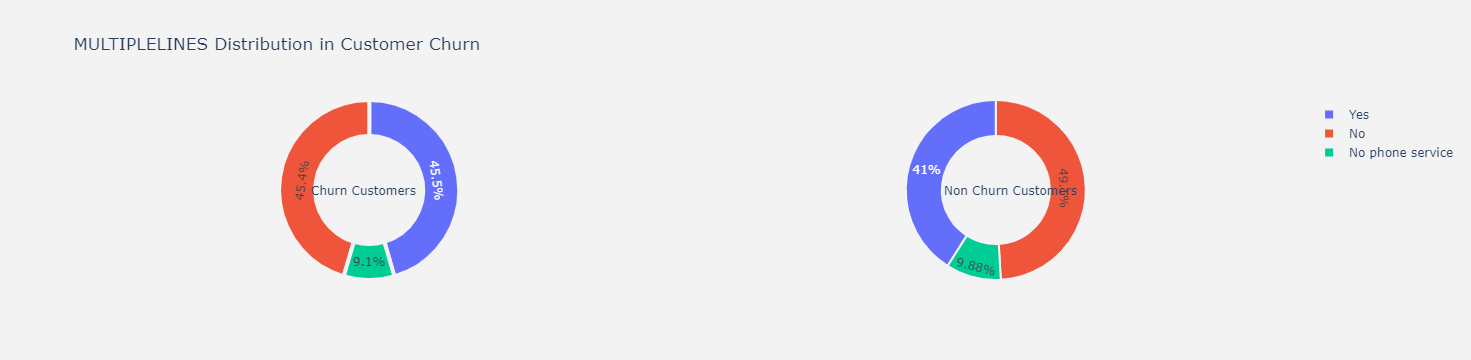

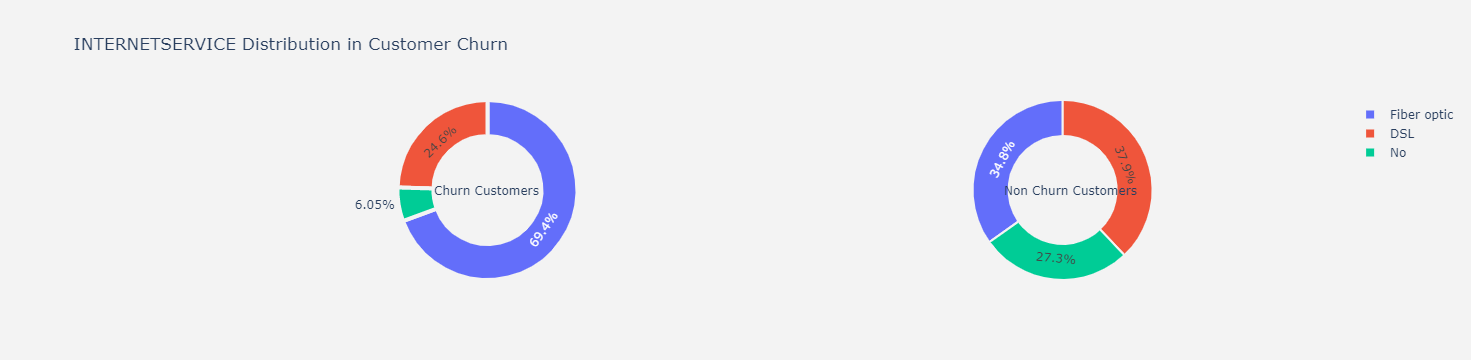

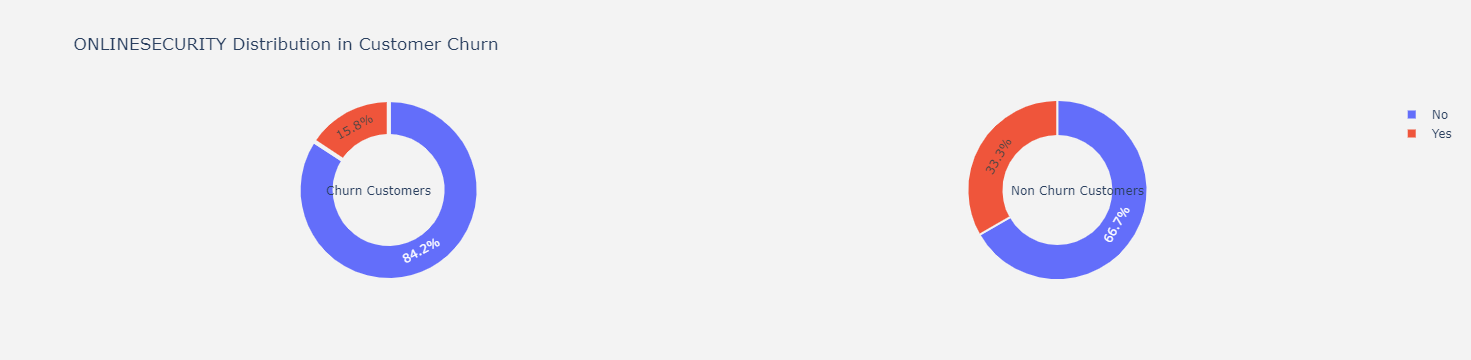

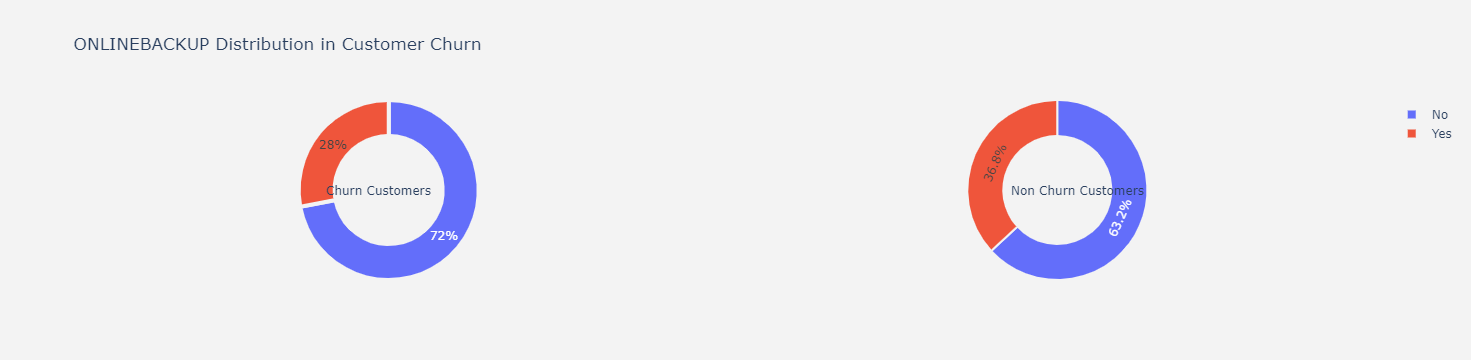

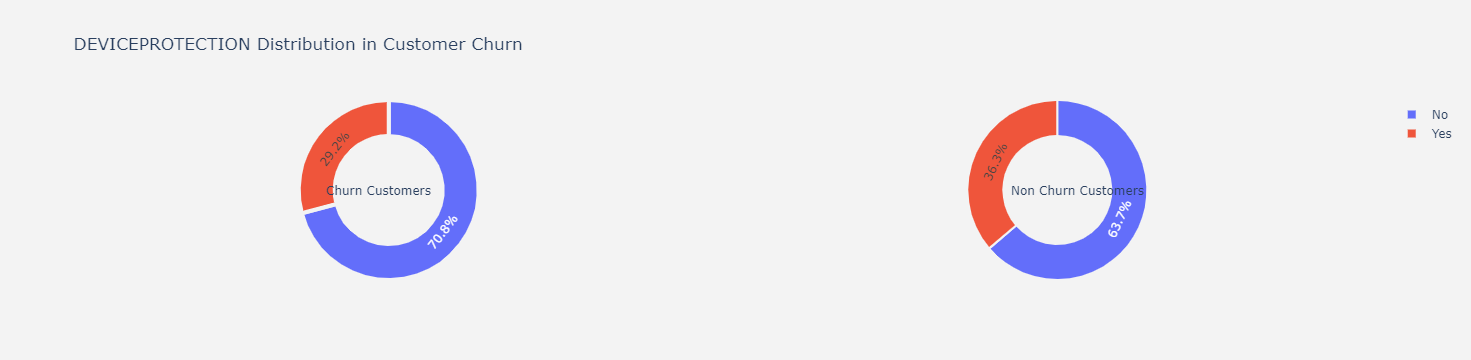

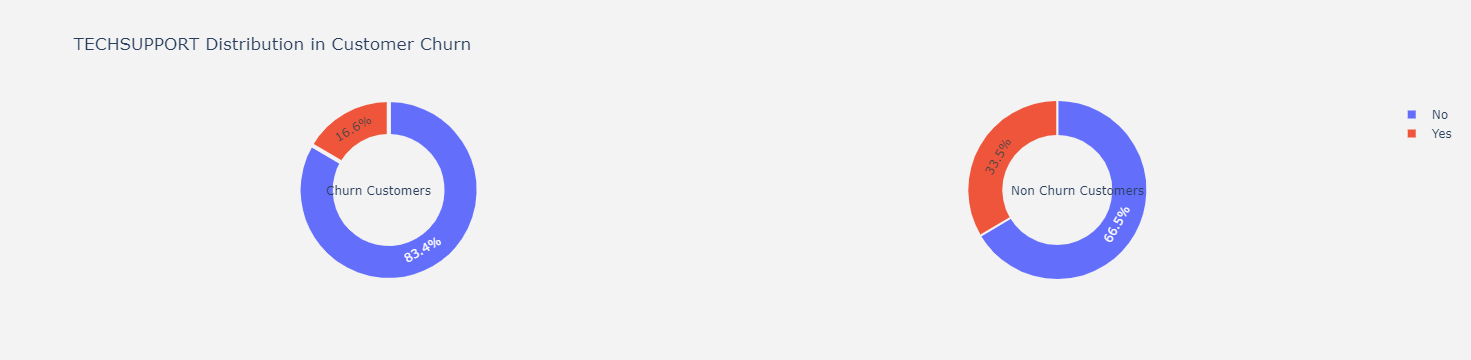

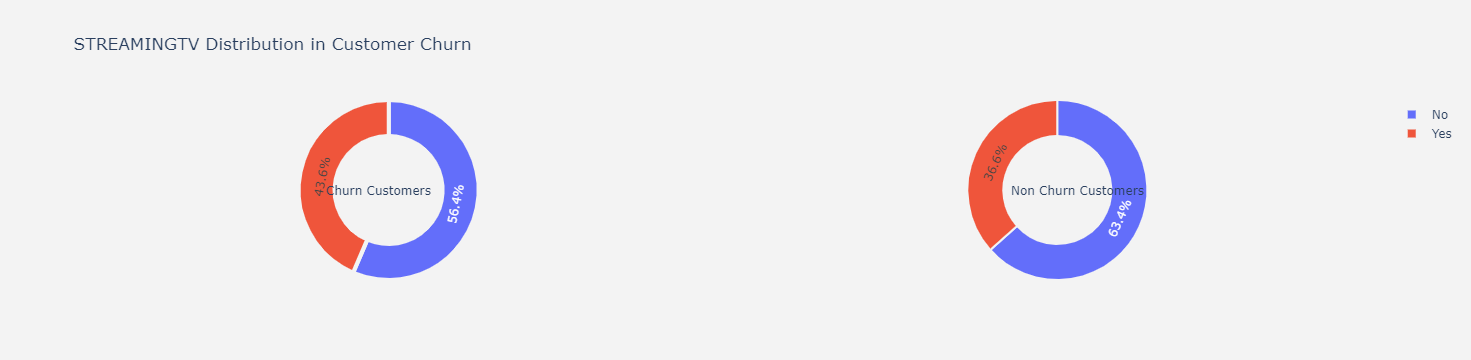

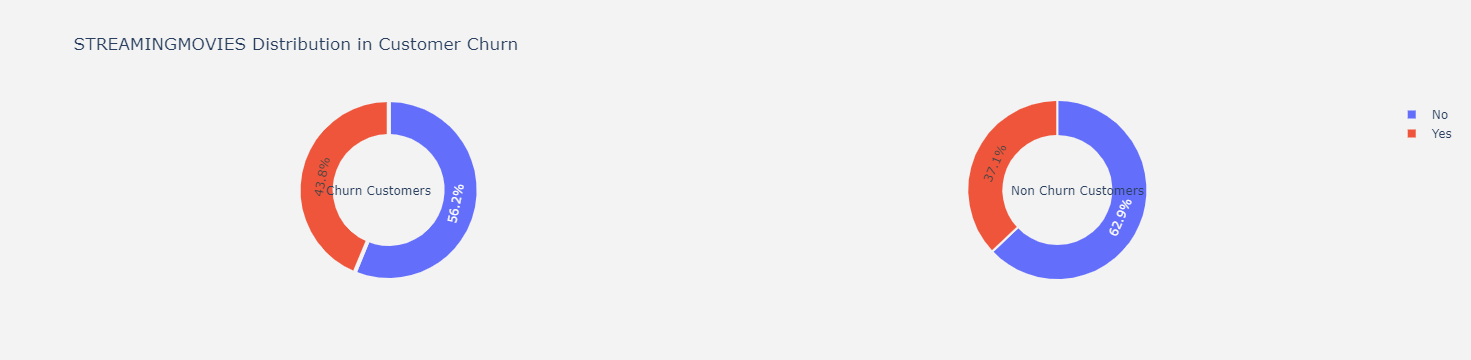

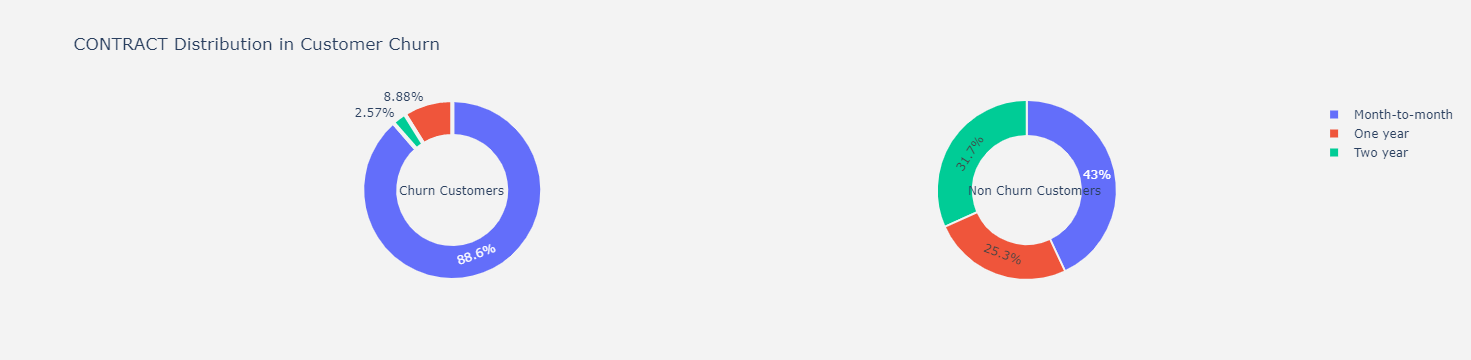

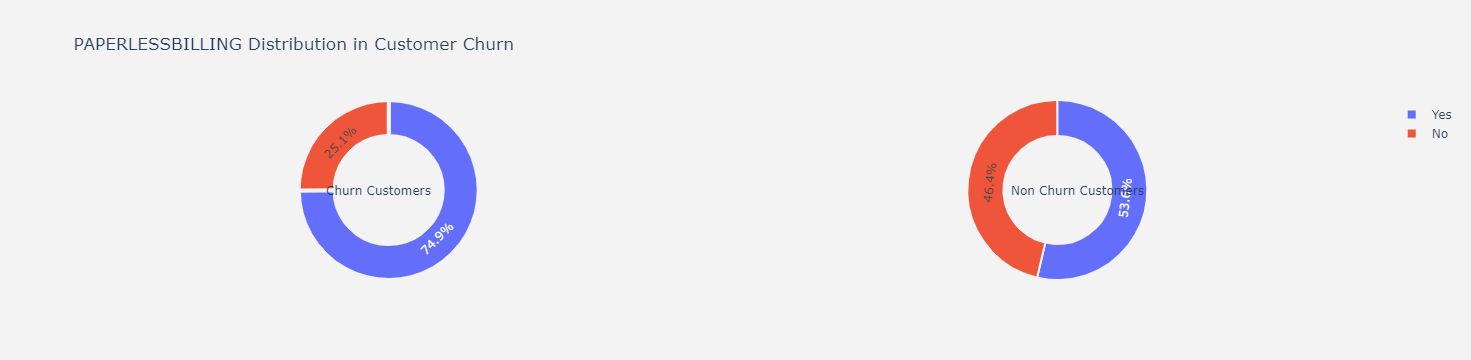

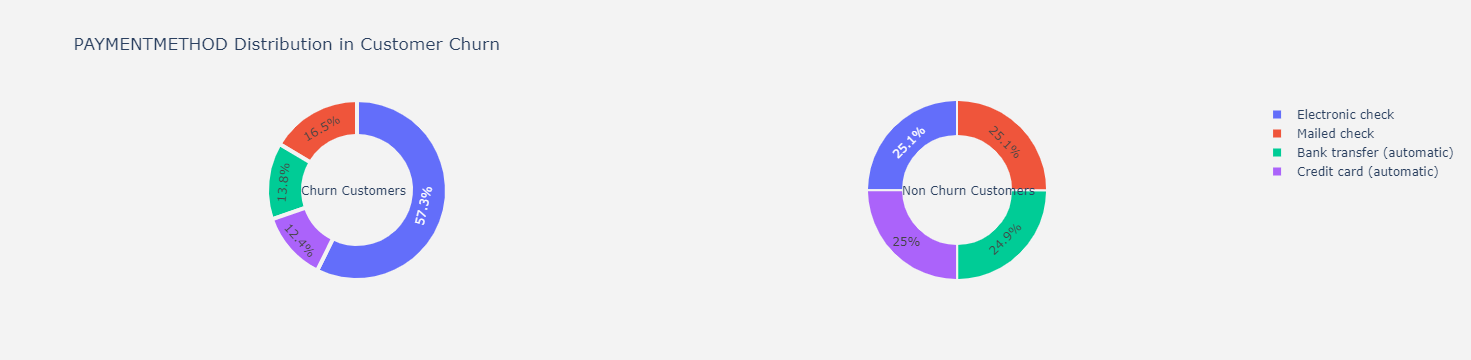

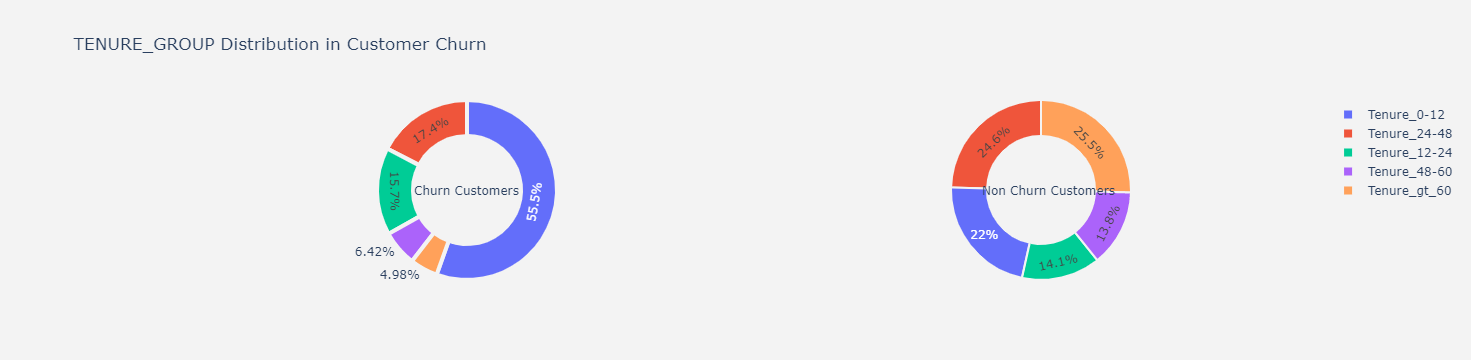

In [33]:
# for all categorical columns plot pie

for i in cat_cols :
    plot_pie(i)

#### Q5. Comment on each and every chart. Is there any chart that does not make sense? 
#### Answer: 

These are the pie charts showing us the percentage of churn and non churn customers among each type of categorical feature. It has been shown in percentage so that we are able to compare their distributions. To be able to compare unequal amounts we have to repesent them as normal distribution means percentage.Observing the difference in distribution of these features among churn and non churn customers could tell us the likely relationship of these features.

- **Gender Distribution in Customer Churn:**
  Gender ratio of churn and non churn customer is very similar with marginal difference of nearly 1%. We have 49.8 % male and 50.2 % female churn customers whereas 50.7 % male and 49.3 % female non churn customers.

- **SeniorCitizen Distribution in Customer Churn:**
   The percentage of senior citizens is double in churned customers than in non churned customers, 25.5% and 12.9% respectively.  

- **Partner Distribution in Customer Churn:**
  There is higher percentage of customers without partners in churn data than non churn customers. 64.2% of Churn customers don't have partners whereas only 47.2 % non churn cutomers don't have partners. 

- **Dependents Distribution in Customer Churn:**
   There is higher percentage of customers without dependents in churn data than non churn customers. 82.6% of Churn customers don't have dependents whereas 65.7% non churn cutomers don't have dependents. 

- **PhoneService Distribution in Customer Churn:**
  Churn and non churn distribution is very similar among customers with or without phone service with a marginal difference of nearly 0.7% in each category. 

- **MultipleLines Distribution in Customer Churn:**
  Churn and non churn distribution is very similar among customers with or without multiple line distribution or no phone service,a small difference of nearly 4% in each category.

- **InternetService Distribution in Customer Churn:**
  Churn customers have percentage of people with Fiber Optic internet Service(69.4%), nearly triple than DSL (24.6%), only 6% of total churn customers have no internet service. Distribution of customers having fiber optic, DSL and    no service internet service is very close in non churn customers, 34.8%, 37.9% and 27.3% respectively.  

- **OnlineSecurity Distribution in Customer Churn:**
   There is nearly 17% higher churn rate among customers with no online security.

- **OnlineBackup Distribution in Customer Churn:**
  There is around 9%, a slightly higher churn rate among customers with no online backup as compared to customers with online backup.
  
- **DeviceProtection Distribution in Customer Churn :**
    There is around 7% higher churn rate among customers with no device protection as compared to customers with device protection.

- **TechSupport Distribution in Customer Churn:**
    There is higher churn rate among those who were not using tech support. Among who churned only 16.6% were using tech support while 83.4% were not using tech support. Among non churned 33.5% were using tech support and 66.5% were not       using tech suuport feature.

- **StreamingTV Distribution in Customer Churn:**
   Among churn customers, 43.6% of those were streaming TV option and 56.4% were not. Among non churned customers, only 36.6% customers were using streaming TV distribution.

- **StreamingMovies Distribution in Customer Churn:**
    Similar trend to streaming TV distribution is seen in Streaming movies, among churn customers, 43.8% were using streaming movies service and 56.2% were not. Among non churned customers, only 37.1% customers were using streaming movies     distribution.
  
- **Contract Distribution in Customer Churn:**
  Collectively customers have majority month to month contract and then 2 year contract followed by 1 year contract. It is clearly evident that Month on Month contracted are curning 88.6%, while one year contract is having the churn rate     of 8.8% only and 2-year contracts are negligible as it is just 2.5%. Among retained customers we near to same distrobution of contract types. 

- **PaperlessBilling Distribution in Customer Churn:**
    There is higher churn rate among those who are using paperless billing. Among who churned nearly 75% were using paperless billing while 25% were not using it. Among non churned 53.6% were using it and 46.4% were not.

- **PaymentMethod Distribution in Customer Churn:**
    Customers having electronic cheque payment method are churning more in comparison to any other payment methods. Percenatge of mailed Cheque, Bank Transfer and Credit Card payment is 16.5%,13.8% and 12.4% respectively. And all these         methods collectively are less than electronic cheque method churn of 57.3%. Looking at non churn customers figures, all these payment methods are in equal proportions.

- **Tenure_group Distribution in Customer Churn:**
    As the tenure has increased churn rate has decreased and retention is optimum. Among churned custmers Tenure 0_12 alone was 55.5% followed by 24_48, 12_24, 48_60 and gt_60 tenure with 17.4%, 15.7%, 6.42 and 4.98% respectively. 
  
##### Conclusively we could say that gender,phone service, multipleline,  don't have much impact on churn whereas SeniorCitizens, people with no partner and dependents had more churn rate, Similarly customers who used Fiber Optic internetService, Streaming TV and Streaming Movies had more churn rate. Churn rate was also seen higher among with no OnlineSecurity, no OnlineBackup, no DeviceProtection and no tech support. People with monthly contract, paperless billing are churning more that goes hand in hand with 0_24 tenure group. People who are paying with e_check are churning more. 

**We can infer from the chracteristics that the customers who are very digital savvy are not going for long trem contracts and are more likely to churn on the other hand we have customers who not using the full coverage of services like senior citizens are likely to churn.**


## Varibles distribution in Churn and Non-churn category: Histograms for Numerical variables
### You need to run the code and understand the output



In [34]:

#function  for histogram for customer attrition types
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =str.upper(column) + " Distribution in customer Churn ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

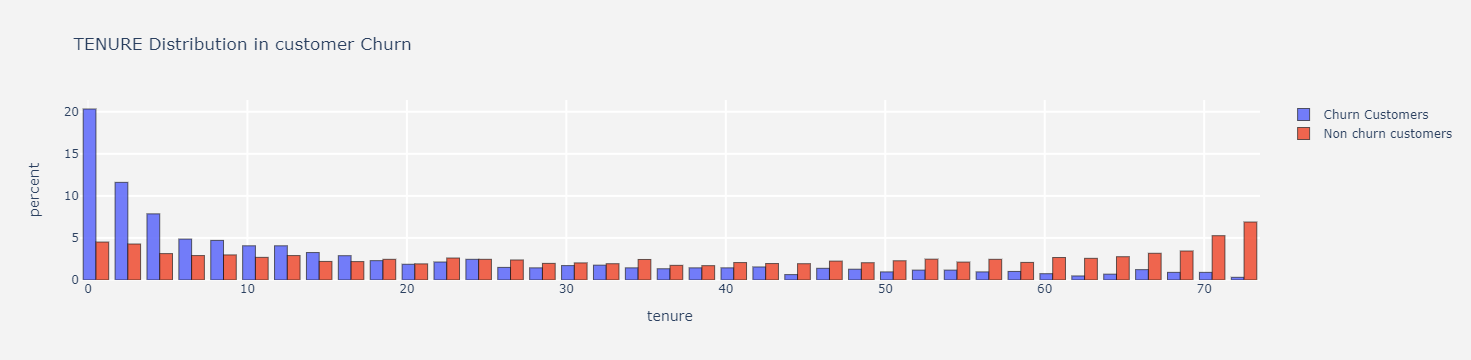

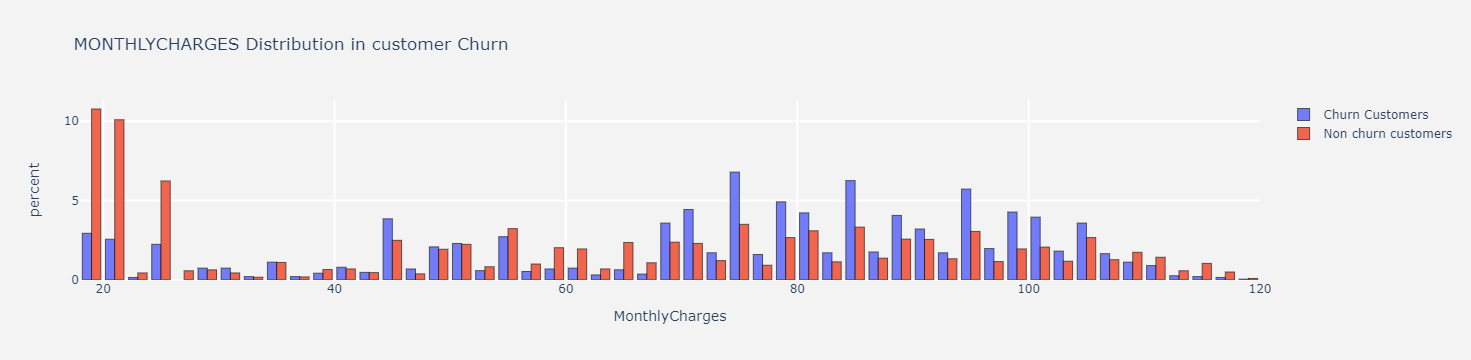

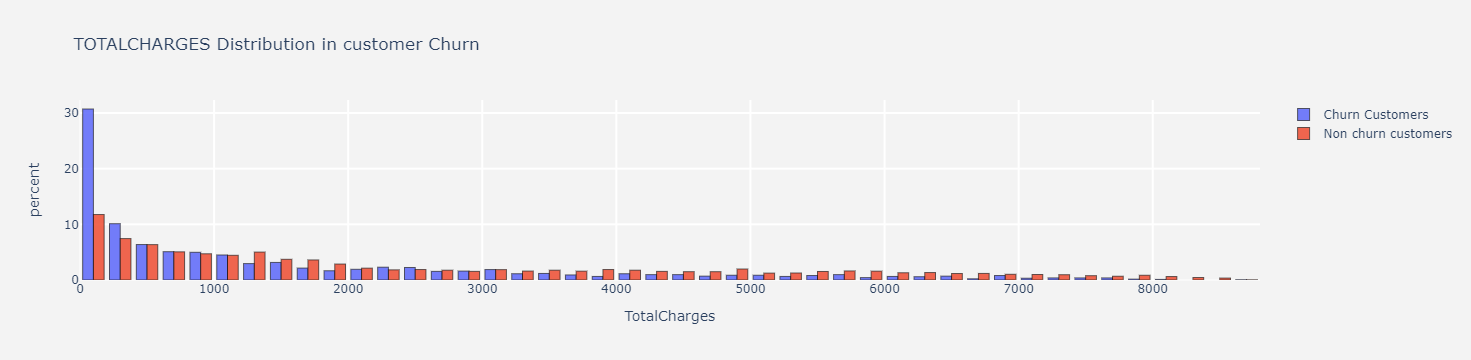

In [35]:
#for all categorical columns plot histogram    
for i in num_cols :
    histogram(i)
plt.show()

#### Q6. Comment on each and every chart. Is there any chart that does not make sense?
#### Answer 6

The histograms represents the number of customers (distribution) who have churned and not churned due to tenure, monthly charges and total charges respectively expressed in terms of %, with blue representing churn and red representing non-churned. 

**Tenure distribution in customer Churn**

Churned customers are more in short term tenures and as the tenure increases the percentage of customers churning is decreasing producing a long tail towards right side producing right skewed distribution. Similarly, customers who are having long term tenure has not churning and few customers having very short tenures have not churned producing left side tail. In a nutshell, as the tenure has increased churn rate has decreased hence retention is stabler.

**Monthly Charges distribution in customer Churn**

The above histogram represents a multimodal distribution with several peaks however majority of churning customers have monthly charges ranging from 70 to 100. We have retained more low paying customers.

**Total Charges distribution in customer Churn**

For both churn and nonchurn customers we have a right skewed distribution (Long tail towards right) and Uni-Model Distribution. Majority of the customers have total charges between 0-2000. Number of churn customers is maximum at lowest total charges.As the total charges has increased churn rate has decreased inverse relationship. (Negative linear relationship)


## Scatter Plot for Numerical variables
### You need to run the code and understand the output


In [36]:
#function  for scatter plot matrix  for numerical columns in data
def scatter_matrix(df)  :
    
    df  = df.sort_values(by = "Churn" ,ascending = True)
    classes = df["Churn"].unique().tolist()
    classes
    
    class_code  = {classes[k] : k for k in range(2)}
    class_code

    color_vals = [class_code[cl] for cl in df["Churn"]]
    color_vals

    pl_colorscale = "Portland"

    pl_colorscale

    text = [df.loc[k,"Churn"] for k in range(len(df))]
    text

    trace = go.Splom(dimensions = [dict(label  = "tenure",
                                       values = df["tenure"]),
                                  dict(label  = 'MonthlyCharges',
                                       values = df['MonthlyCharges']),
                                  dict(label  = 'TotalCharges',
                                       values = df['TotalCharges'])],
                     text = text,
                     marker = dict(color = color_vals,
                                   colorscale = pl_colorscale,
                                   size = 3,
                                   showscale = False,
                                   line = dict(width = .1,
                                               color='rgb(230,230,230)'
                                              )
                                  )
                    )
    axis = dict(showline  = True,
                zeroline  = False,
                gridcolor = "#fff",
                ticklen   = 4
               )
    
    layout = go.Layout(dict(title  = 
                            "Scatter plot matrix for Numerical columns for customer churn",
                            autosize = False,
                            height = 800,
                            width  = 800,
                            dragmode = "select",
                            hovermode = "closest",
                            plot_bgcolor  = 'rgba(240,240,240, 0.95)',
                            xaxis1 = dict(axis),
                            yaxis1 = dict(axis),
                            xaxis2 = dict(axis),
                            yaxis2 = dict(axis),
                            xaxis3 = dict(axis),
                            yaxis3 = dict(axis),
                           )
                      )
    data   = [trace]
    fig = go.Figure(data = data,layout = layout )
    py.iplot(fig)

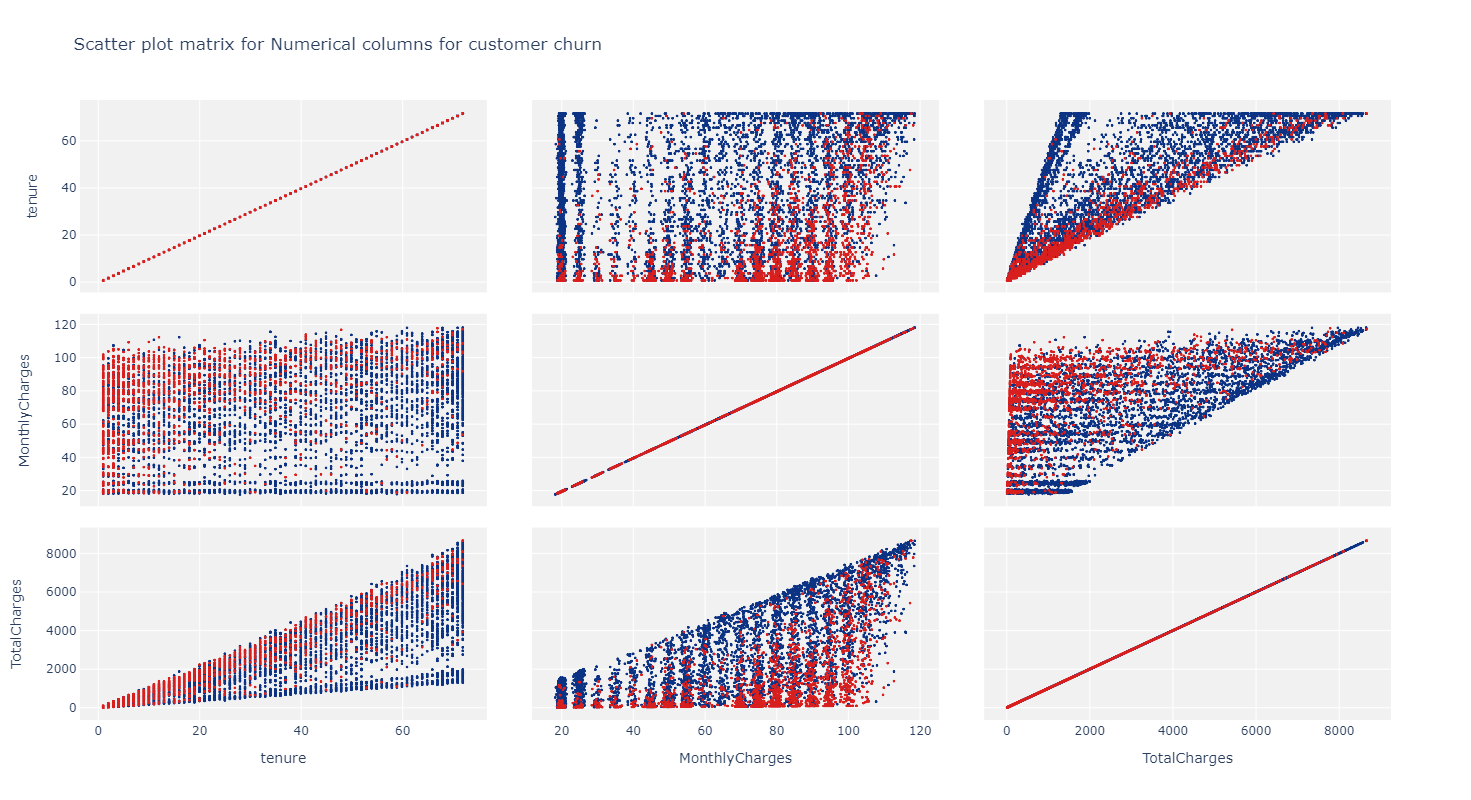

In [37]:
#scatter plot matrix
scatter_matrix(telcom)


#### Answer 7 Scatter Plots are reinforcing what we saw in the histograms,  the number of churned and non churned customers distribution as a combination of tenure with total charges, total charges with monthly charges and tenure with monthly charges

**Tenure with Total Charges**: as the tenure has increased churn rate has decreased hence retention is stabler. Churn rate is higher when total charges are low. Total chrges increase as the tenure increases (positive linear relationship, however wide and weak) 

**Monthly Charges with Total Charges**: As the monthly charges increase total charges increase (Positive linear realtinship. Majority of churning customers have monthly charges ranging from 70 to 100. Churn rate is when total charges are less than 2000.

**Monthly Charges with Tenure**: Monthly charges are spread widely among tenure.(More of static stripes)  No relationship betweeen monthly charges and tenure. However churn is higher when monthly charges are high.



# Churn Prediction Analysis Part 2

In [38]:
# Load the cleaned file
telcom = pd.read_csv("clean_df.csv")
pd.set_option("display.max_columns", None)

In [39]:
telcom = telcom.drop('Unnamed: 0', axis = 1)

In [40]:
telcom.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  tenure_group  
0    No   Tenure_0-12  
1    No  Tenure_24-48  
2   Yes   Tenure_0-12  
3    No  Tenure_24-48  
4   Yes   Tenure_0-12

## Data Pre-Processing

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#minmax scaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

#Binary columns with 2 values
bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [42]:
multi_cols

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'tenure_group']

In [43]:
#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols)


In [44]:
telcom

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0     7590-VHVEG       0              0        1           0       1   
1     5575-GNVDE       1              0        0           0      34   
2     3668-QPYBK       1              0        0           0       2   
3     7795-CFOCW       1              0        0           0      45   
4     9237-HQITU       0              0        0           0       2   
...          ...     ...            ...      ...         ...     ...   
7027  6840-RESVB       1              0        1           1      24   
7028  2234-XADUH       0              0        1           1      72   
7029  4801-JZAZL       0              0        1           1      11   
7030  8361-LTMKD       1              1        1           0       4   
7031  3186-AJIEK       1              0        0           0      66   

      PhoneService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                0               0             1                 0   
1                1               1             0                 1   
2                1               1             1                 0   
3                0               1             0                 1   
4                1               0             0                 0   
...            ...             ...           ...               ...   
7027             1               1             0                 1   
7028             1               0             1                 1   
7029             0               1             0                 0   
7030             1               0             0                 0   
7031             1               1             0                 1   

      TechSupport  StreamingTV  StreamingMovies  PaperlessBilling  \
0               0            0                0                 1   
1               0            0                0                 0   
2               0            0                0                 1   
3               1            0                0                 0   
4               0            0                0                 1   
...           ...          ...              ...               ...   
7027            1            1                1                 1   
7028            0            1                1                 1   
7029            0            0                0                 1   
7030            0            0                0                 1   
7031            1            1                1                 1   

      MonthlyCharges  TotalCharges  Churn  MultipleLines_No  \
0              29.85         29.85      0                 0   
1              56.95       1889.50      0                 1   
2              53.85        108.15      1                 1   
3              42.30       1840.75      0                 0   
4              70.70        151.65      1                 1   
...              ...           ...    ...               ...   
7027           84.80       1990.50      0                 0   
7028          103.20       7362.90      0                 0   
7029           29.60        346.45      0                 0   
7030           74.40        306.60      1                 0   
7031          105.65       6844.50      0                 1   

      MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                                  1                  0                    1   
1                                  0                  0                    1   
2                                  0                  0                    1   
3                                  1                  0                    1   
4                                  0                  0                    0   
...                              ...                ...                  ...   
7027                               0                  1                    1   
7028                               0                  1                   

In [45]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [46]:
scaled

tenure  MonthlyCharges  TotalCharges
0    -1.280248       -1.161694     -0.994194
1     0.064303       -0.260878     -0.173740
2    -1.239504       -0.363923     -0.959649
3     0.512486       -0.747850     -0.195248
4    -1.239504        0.196178     -0.940457
...        ...             ...           ...
7027 -0.343137        0.664868     -0.129180
7028  1.612573        1.276493      2.241056
7029 -0.872808       -1.170004     -0.854514
7030 -1.158016        0.319168     -0.872095
7031  1.368109        1.357932      2.012344

[7032 rows x 3 columns]

In [47]:
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

### Q8 What is the purpose of the above code?
### Answer 8
- to normalises and standardizes the data , drop the original fielads and then merge those genrated fields with dataframe
  - reduction of data redundancy (label encoder is used to convert all categorical features with binary values to numerical value of 0/1)
  - reduction of data redundancy (dummies is used to convert all categorical features with multiple values to additional columns with numerical value of 0/1)
  - data has been standardized by using standard scaler (scaling is for numerical values to obtain values in a fixed range)
- As all the features in the dataset were categorical except the three numerical features - Tenure, MonthlyCharges and TotalCharges, to create the machine learning model we will convert the categorical variables into 0's and 1's, numeric values should also be stadardized to treat the data imbalance issue.

In [48]:
telcom.head()

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0  7590-VHVEG       0              0        1           0             0   
1  5575-GNVDE       1              0        0           0             1   
2  3668-QPYBK       1              0        0           0             1   
3  7795-CFOCW       1              0        0           0             0   
4  9237-HQITU       0              0        0           0             1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   
2               1             1                 0            0            0   
3               1             0                 1            1            0   
4               0             0                 0            0            0   

   StreamingMovies  PaperlessBilling  Churn  MultipleLines_No  \
0                0                 1      0                 0   
1                0                 0      0                 1   
2                0                 1      1                 1   
3                0                 0      0                 0   
4                0                 1      1                 1   

   MultipleLines_No phone service  MultipleLines_Yes  InternetService_DSL  \
0                               1                  0                    1   
1                               0                  0                    1   
2                               0                  0                    1   
3                               1                  0                    1   
4                               0                  0                    0   

   InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  \
0                            0                   0                        1   
1                            0                   0                        0   
2                            0                   0                        1   
3                            0                   0                        0   
4                            1                   0                        1   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_Tenure_0-12  \
0                           0                         1   
1                           1                         0   
2                           1                         1   
3                           0                         0   
4                           0                         1   

   tenure_group_Tenure_12-24  tenure_group_Tenure_24-48  \
0                          0                          0   
1                          0                          1   
2                          0                          0   
3                          0                          1   
4                          0                          0   

   tenure_group_Tenure_48-60  tenure_group_Te

In [49]:
summary = telcom.describe().transpose()
summary

count          mean       std  \
gender                                   7032.0  5.046928e-01  0.500014   
SeniorCitizen                            7032.0  1.624005e-01  0.368844   
Partner                                  7032.0  4.825085e-01  0.499729   
Dependents                               7032.0  2.984926e-01  0.457629   
PhoneService                             7032.0  9.032992e-01  0.295571   
OnlineSecurity                           7032.0  2.865472e-01  0.452180   
OnlineBackup                             7032.0  3.448521e-01  0.475354   
DeviceProtection                         7032.0  3.438567e-01  0.475028   
TechSupport                              7032.0  2.901024e-01  0.453842   
StreamingTV                              7032.0  3.843857e-01  0.486484   
StreamingMovies                          7032.0  3.883675e-01  0.487414   
PaperlessBilling                         7032.0  5.927190e-01  0.491363   
Churn                                    7032.0  2.657850e-01  0.441782   
MultipleLines_No                         7032.0  4.813709e-01  0.499688   
MultipleLines_No phone service           7032.0  9.670080e-02  0.295571   
MultipleLines_Yes                        7032.0  4.219283e-01  0.493902   
InternetService_DSL                      7032.0  3.435722e-01  0.474934   
InternetService_Fiber optic              7032.0  4.402730e-01  0.496455   
InternetService_No                       7032.0  2.161547e-01  0.411650   
Contract_Month-to-month                  7032.0  5.510523e-01  0.497422   
Contract_One year                        7032.0  2.093288e-01  0.406858   
Contract_Two year                        7032.0  2.396189e-01  0.426881   
PaymentMethod_Bank transfer (automatic)  7032.0  2.192833e-01  0.413790   
PaymentMethod_Credit card (automatic)    7032.0  2.162969e-01  0.411748   
PaymentMethod_Electronic check           7032.0  3.363197e-01  0.472483   
PaymentMethod_Mailed check               7032.0  2.281001e-01  0.419637   
tenure_group_Tenure_0-12                 7032.0  3.093003e-01  0.462238   
tenure_group_Tenure_12-24                7032.0  1.456200e-01  0.352750   
tenure_group_Tenure_24-48                7032.0  2.266780e-01  0.418712   
tenure_group_Tenure_48-60                7032.0  1.183163e-01  0.323005   
tenure_group_Tenure_gt_60                7032.0  2.000853e-01  0.400092   
tenure                                   7032.0 -1.214741e-16  1.000071   
MonthlyCharges                           7032.0  9.652878e-17  1.000071   
TotalCharges                             7032.0 -1.172113e-16  1.000071   

                                              min       25%       50%  \
gender                                   0.000000  0.000000  1.000000   
SeniorCitizen                            0.000000  0.000000  0.000000   
Partner                                  0.000000  0.000000  0.000000   
Dependents                               0.000000  0.000000  0.000000   
PhoneService                             0.000000  1.000000  1.000000   
OnlineSecurity                           0.000000  0.000000  0.000000   
OnlineBackup                             0.000000  0.000000  0.000000   
DeviceProtection                         0.000000  0.000000  0.000000   
TechSupport                              0.000000  0.000000  0.000000   
StreamingTV                              0.000000  0.000000  0.000000   
StreamingMovies                          0.000000  0.000000  0.000000   
PaperlessBilling                         0.000000  0.000000  1.000000   
Churn                                    0.000000  0.000000  0.000000   
MultipleLines_No                         0.000000  0.000000  0.000000   
MultipleLines_No phone service           0.000000  0.000000  0.000000   
MultipleLines_Yes                        0.000000  0.000000  0.000000   
InternetService_DSL                      0.000000  0.000000  0.000000   
InternetService_Fiber optic              0.000000  0.000000  0.000000   
InternetService_No           

In [50]:
# Variable Summary

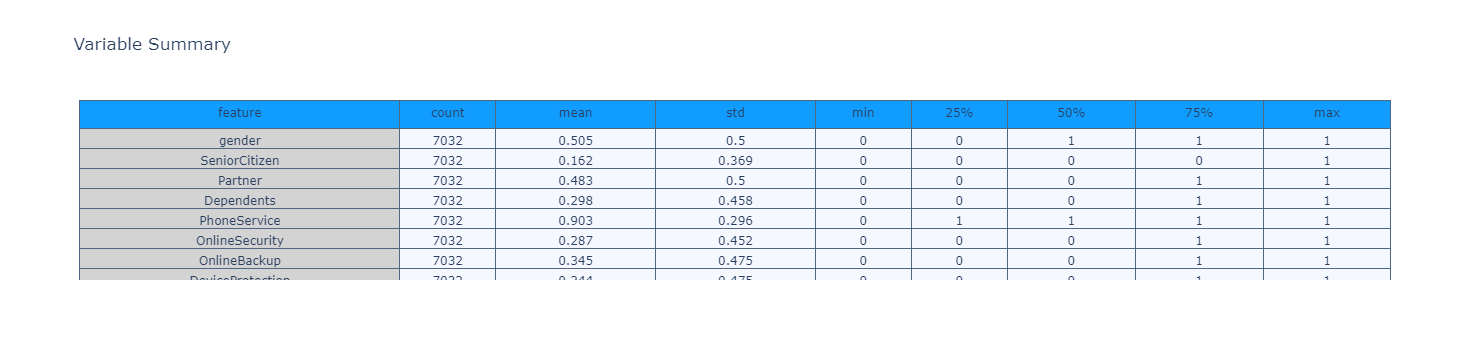

In [51]:
# To make it look nice we can do some additional stuff if needed
summary = (telcom[[i for i in telcom.columns if i not in Id_col]].
           describe().transpose().reset_index())

summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary,3)

val_lst = [summary['feature'], summary['count'],
           summary['mean'],summary['std'],
           summary['min'], summary['25%'],
           summary['50%'], summary['75%'], summary['max']]

trace  = go.Table(header = dict(values = summary.columns.tolist(),
                                line = dict(color = ['#506784']),
                                fill = dict(color = ['#119DFF']),
                               ),
                  cells  = dict(values = val_lst,
                                line = dict(color = ['#506784']),
                                fill = dict(color = ["lightgrey",'#F5F8FF'])
                               ),
                  columnwidth = [200,60,100,100,60,60,80,80,80])
layout = go.Layout(dict(title = "Variable Summary"))
figure = go.Figure(data=[trace],layout=layout)
py.iplot(figure)

In [52]:
#correlation
correlation = telcom.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [53]:
#convert to array
corr_array  = np.array(correlation)

In [54]:
correlation

gender  SeniorCitizen   Partner  \
gender                                   1.000000      -0.001819 -0.001379   
SeniorCitizen                           -0.001819       1.000000  0.016957   
Partner                                 -0.001379       0.016957  1.000000   
Dependents                               0.010349      -0.210550  0.452269   
PhoneService                            -0.007515       0.008392  0.018397   
OnlineSecurity                          -0.016328      -0.038576  0.143346   
OnlineBackup                            -0.013093       0.066663  0.141849   
DeviceProtection                        -0.000807       0.059514  0.153556   
TechSupport                             -0.008507      -0.060577  0.120206   
StreamingTV                             -0.007124       0.105445  0.124483   
StreamingMovies                         -0.010105       0.119842  0.118108   
PaperlessBilling                        -0.011902       0.156258 -0.013957   
Churn                                   -0.008545       0.150541 -0.149982   
MultipleLines_No                         0.004335      -0.136377 -0.130028   
MultipleLines_No phone service           0.007515      -0.008392 -0.018397   
MultipleLines_Yes                       -0.008883       0.142996  0.142561   
InternetService_DSL                      0.007584      -0.108276 -0.001043   
InternetService_Fiber optic             -0.011189       0.254923  0.001235   
InternetService_No                       0.004745      -0.182519 -0.000286   
Contract_Month-to-month                 -0.003251       0.137752 -0.280202   
Contract_One year                        0.007755      -0.046491  0.083067   
Contract_Two year                       -0.003603      -0.116205  0.247334   
PaymentMethod_Bank transfer (automatic) -0.015973      -0.016235  0.111406   
PaymentMethod_Credit card (automatic)    0.001632      -0.024359  0.082327   
PaymentMethod_Electronic check           0.000844       0.171322 -0.083207   
PaymentMethod_Mailed check               0.013199      -0.152987 -0.096948   
tenure_group_Tenure_0-12                -0.001050      -0.027713 -0.305061   
tenure_group_Tenure_12-24               -0.000649       0.001860 -0.048481   
tenure_group_Tenure_24-48               -0.010516       0.020383  0.028468   
tenure_group_Tenure_48-60               -0.004319       0.014186  0.105341   
tenure_group_Tenure_gt_60                0.016279      -0.002407  0.280353   
tenure                                   0.005285       0.015683  0.381912   
MonthlyCharges                          -0.013779       0.219874  0.097825   
TotalCharges                             0.000048       0.102411  0.319072   

                                         Dependents  PhoneService  \
gender                                     0.010349     -0.007515   
SeniorCitizen                             -0.210550      0.008392   
Partner                                    0.452269      0.018397   
Dependents                                 1.000000     -0.001078   
PhoneService                              -0.001078      1.000000   
OnlineSecurity                             0.080786     -0.091676   
OnlineBackup                               0.023639     -0.052133   
DeviceProtection                           0.013900     -0.070076   
TechSupport                                0.063053     -0.095138   
StreamingTV                               -0.016499     -0.021383   
StreamingMovies                           -0.038375     -0.033477   
PaperlessBilling                          -0.110131      0.016696   
Churn                                     -0.163128      0.011691   
MultipleLines_No                           0.023388      0.315218   
MultipleLines_No phone service             0.001078     -1.000000   
MultipleLines_Yes                         -0.024307      0.279530   
InternetService_DSL                        0.051593     -0.452255   
InternetService_Fiber optic               -0.164101      0.290183   
I

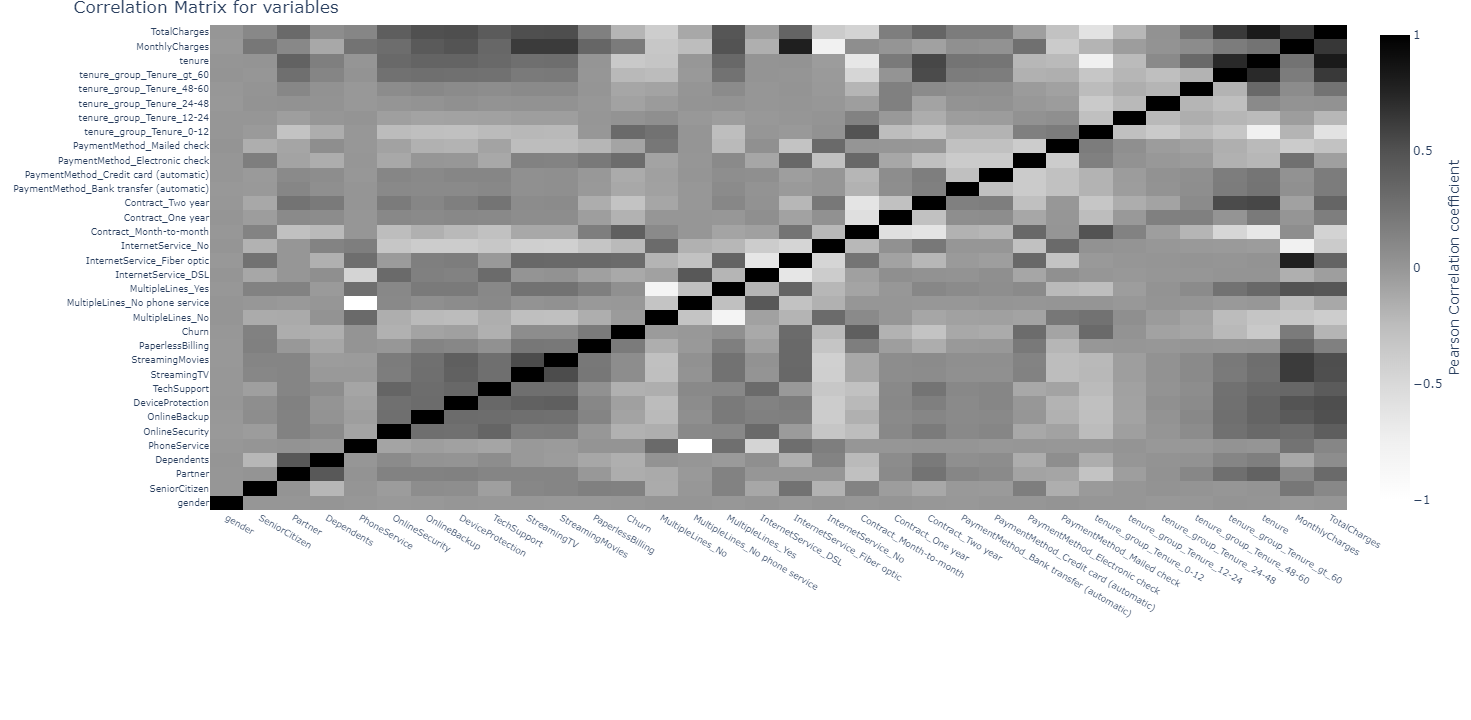

In [55]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Greys",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

#### Q9. What do you observe?
#### Answer 9: 

The graph shows corelation coefficients between all the variables as a heat map; as the color changes from light to dark the correlation is higher. Areas of interest are the ones that are dark spots because that would mean positive coorlation between features. Each block in the table shows the correlation between two variables. A correlation matrix is summarizing data and representing the relationship between those variables. From the above output of correlation matrix, we can see that it is symmetrical i.e. the bottom right is same as the top left. Ranging from -1 (negative correlated) to 1 (positive correlated), we could observe features that have higher importance than others. Observing churn's coorelation closely with other variables we see it does not have high coorelation with most of the features except the following

- Senior citizen                0.5
- Contract month-month          0.404
- tenure group 0-12             0.31
- Internet service fibre optic  0.307
- Payment Method                0.30
- paperless billing             0.19
- Streaming tv                  0.06
- Streaming movie               0.06
- Multiple line                 0.04
- Phone service                 0.011

Additionally there is high corelation between Total charges as well as monthly charges with other services. Total charges increases with the tenure and monthly charges perhaps depend on the services the customer purchases. As the tenure is increasing person would have paid cumulatively more charges for example there is also high corelation between Monhtly charges and internetservice_fiber optic, indicating that customers opting for internet services pay more monthly charges than other customers. StreamingTV, StreamingMovie and Monthly Charges have a high correlation with one another. On the other hand one year contract, two year and monthly charges have negative relationship, suggesting having longer tenure would have overall less charges than monthly charges.



In [56]:
#correlation[correlation > 0.5 ]

## Model Building (We will build Decision Tree and Logistics Regression models)

In [57]:
# Separate the features from the class label and split the dataset into training and testing sets

In [58]:
# Import all the modules

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn import metrics

In [59]:
#splitting train and test data 
train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)

### Q10. What is the purpose of random_state parameter?
#### Answer 10: 

Every model must first be trained before it can predict fresh data. As a result, it's critical to partition our datasets into a percentage of training sets and a percentage of test sets. As a result, random shuffling of data in any dataset is required in order to avoid biases in data prediction. The random state option in sklearn gives the function's internal random number generator a seed value. If the seed value is same, we'll get same randomised training and test splits when we run the model again. While we code and we want the split to be same we use this parameter. We can choose a number of random_state for our model.  

It's a setting that allows us to achieve consistent outcomes. If we set it to a specific number, we'll receive the same result every time we run the code. This will also happen if we set it to another number. (but probably with different values than before). If we leave it at None (the default), a random seed will be picked each time, giving us varied results everytime we run the code. Therefore the objective of explicitly mentioning random_state is to be able to replicate and reproduce the same results of the model with same parameters and training data, every time we execute it.

In [60]:
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i not in Id_col + target_col]
X_train = train[cols]
Y_train = train[target_col]
X_test  = test[cols]
Y_test  = test[target_col]

In [61]:
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMethod_Mailed check',
 'tenure_group_Tenure_0-12',
 'tenure_group_Tenure_12-24',
 'tenure_group_Tenure_24-48',
 'tenure_group_Tenure_48-60',
 'tenure_group_Tenure_gt_60',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

## Logistics Regression

In [62]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [63]:
# Predicting test set
y_pred = classifier.predict(X_test)


In [64]:
classifier.coef_

array([[-0.08956513,  0.21558014,  0.00261906, -0.13203257, -0.17862671,
        -0.42725076, -0.18892686, -0.00870765, -0.31126702,  0.1796353 ,
         0.2575459 ,  0.36799933, -0.27665439,  0.18276813,  0.09802767,
        -0.04404611,  0.6523884 , -0.60420088,  0.72158801,  0.02814352,
        -0.74559011, -0.00908812, -0.13951954,  0.22585735, -0.07310827,
        -0.25144924, -0.65053012, -0.18549019,  0.54855011,  0.54306085,
        -1.37383609,  0.18818407,  0.24841276]])

In [65]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print(f"Accuracy Score {accuracy_score(Y_test, y_pred)}")
print(f"Precision Score {precision_score(Y_test, y_pred)}")
print(f"Recall Score {recall_score(Y_test, y_pred)}")
print(f"F1 Score{f1_score(Y_test, y_pred)}")

Accuracy Score 0.8020477815699659
Precision Score 0.6888297872340425
Recall Score 0.5285714285714286
F1 Score0.5981524249422633


In [66]:
#Calculating ROC/AUC the Results
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred)

0.718150067598017

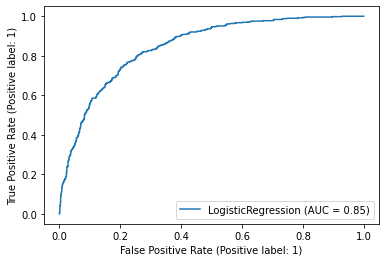

In [67]:
# adding ROC/AUC curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(classifier, X_test, Y_test)

###  Q 11. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.
### Answer 11.

Accuracy, Precision, Recall Score and F1 score help to determine the quality of the model that is if the model is good fir or not. 

- **Accuracy  Score** is the number of correctly categorized examples divided by the total number of examples. Accuracy is useful but it does not consider the subtleties of class imbalances, or differing costs of false negatives and false positives.
- **Precision score** is the ratio of all correctly predicted positive values against all actual positive cases or in other words it is the fraction of true positive examples among the examples that the model classified as positive or simply the number of true positives divided by the number of false positives plus true positives.
- **Recall score** is the ratio of all correctly identified positive cases over all actual positive cases. It is also known as sensitivity, is the fraction of examples classified as positive, among the total number of positive examples. In other words, the number of true positives divided by the number of true positives plus false negatives.
- **F1 score** is weighted average of precision and recall, it considers false positives and negatives too. It is called the harmonic mean of the precision and recall. A perfect model has an F-score of 1. It is the best metric than the rest of the above.

In classifier instead of accuracy score, presicion and recall is more considerable. Accuracy is 80% only and all other scores are comparatively lower. The model has a precison score of 68.89%, Recall 52.86% and F1 score of 59.81%. **The ROC_AUC score is 0.7181 , AUC curve value is 0.85** Considering these these scores, the model is not a bad fit and perhaps can be further improved.

Test Data Accuracy: 0.8020


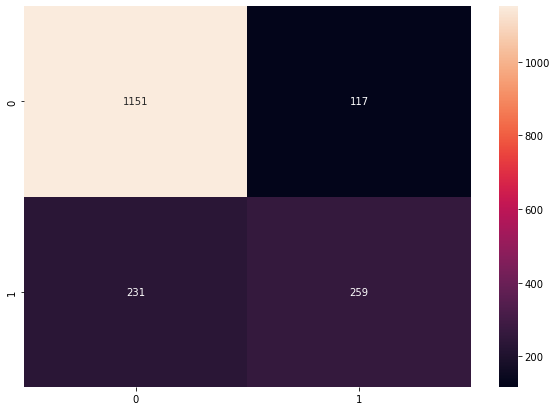

In [68]:
# Build the confusion matrix
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

## Decision Tree

In [69]:
model_tree = DecisionTreeClassifier(random_state = 2)
model_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=2)

In [70]:
# Predicting test set
y_pred = model_tree.predict(X_test)

In [71]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)
print(f"Accuracy Score {accuracy_score(Y_test, y_pred)}")
print(f"Precision Score {precision_score(Y_test, y_pred)}")
print(f"Recall Score {recall_score(Y_test, y_pred)}")
print(f"F1 Score{f1_score(Y_test, y_pred)}")

Accuracy Score 0.732650739476678
Precision Score 0.521551724137931
Recall Score 0.49387755102040815
F1 Score0.5073375262054507


In [72]:
#Calculating ROC/AUC the Results
roc_auc_score(Y_test, y_pred)

0.6593993433335479

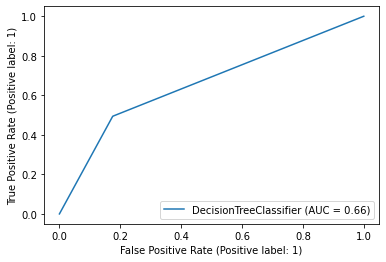

In [73]:
# adding ROC/AUC curve
plot_roc_curve(model_tree, X_test, Y_test)

###  Q12. What do the scores mean? Is this a good model fit based on the scores. Make sure you print all the scores.
### Answer 12:

As explained above in answer 11, all the four scores help us understand the model performance. We could look at either accuracy score or f1 score. In the above model accuracy is 73.26% only. The model has a precison score of 52.15%, Recall score of 49.38% and F1 score of 50.73%. Compared to logistic regression model the decision tree has all the scores lower than it. Considering these these scores, the model is not a very good fit and further improvements are required however the logistic regression is a better model than this. **The ROC_AUC score is 0.659 and AUC curve value for Decision Tree model is 0.66**

Test Data Accuracy: 0.7327


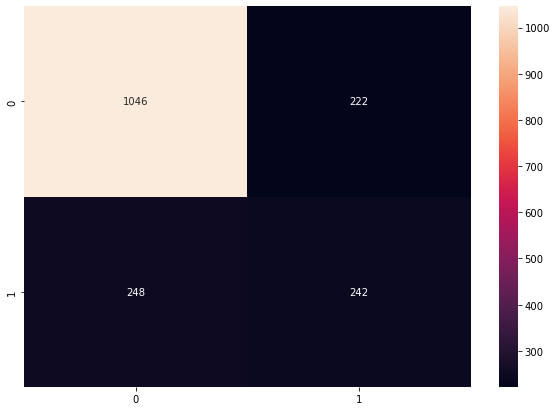

In [74]:
# Build Confusion Matrix

df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

 ### Q 13 Which model performs better? (Hint: compare the metrics)
 ### Answer 13
 
- Logistic regression model is pedicting 1151 True positives(TP) and 259 True negatives(TN) as compared to 1046 TP and 242 TN in decision tree.
- Logistic regression model is pedicting 231 False positives(FP) and 117 False negatives(FN) as compared to 248 FP and 222 FN in decision tree.
- Accuracy score of Logistic regression model is 80% against decison tree that has only 73% accuracy which is comparatively less.
- Precision score of Logistic Regression model is 16% higher than the decision tree model.
- Recall score of Logistic Regression model is also 3% higher than the decision tree model.
- F1 score for both the models is between to 50-60% only howeever Logistic Regression has a better F1 score than Decision tree model by nearly 10% being 59.81%.
- The AUC curve value for LR Model is 0.85 whereas the decision tree it is 0.66.

Therefore, by comparing the matrix for both the models, the Logistic Regression and the Decision Tree model, we can say that Logistics Regression Model is performing better than Decision Tree Model.

## K- fold Cross Validation

### Q 14. What is K-fold cross validation?
### Answer 14

- To evaluate machine learning models it is imperative to test its performance on an independent data set (the data set which was not used for training the machine learning model). Cross Validation estimate the performance of the model.  By using cross validation, we “test” our model in the “training” phase to check for overfitting and to get an idea about how our model will generalize to independent data, which is the test data set given in the problem.

- It is a statistical method applied through resampling to estimate the accuracy of machine learning models.

- The procedure uses a single parameter called k that refers to the number of groups that a given data sample should be split into. For example when value of K is chosen as 10, the model is called 10-fold cross-validation.

- The train data is randomly split into K-number of groups or folds approximately equal size, one fold is treated as validation set and rest of the groups are used to fit the model. The process is repeated k number of times, every time choosing the different fold as a validation data and a train data. It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.For reducing the variance, several rounds of cross validation are performed by using different cross validation training sets and cross validation testing sets. The results from all the rounds are averaged to estimate the accuracy of the machine learning model. 

- In the k-fold cross validation method, all the entries in the original training data set are used for both training as well as validation. Also, each entry is used for validation just once.

In [75]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y =Y_train, cv =10)

In [76]:
# Check for accuracies
accuracies

array([0.80681818, 0.78219697, 0.82386364, 0.8219697 , 0.83301708,
       0.79316888, 0.78937381, 0.80075901, 0.80265655, 0.78937381])

In [77]:
# Check for mean of accuracies
accuracies.mean()

0.8043197630958542

### Q15. What do accuracies tell?
### Answer 15 

The above accuracies range within 0.78 to 0.83 with an average of around 0.804 telling us that the K-fold model is having better accuracy rate and is able to predict better than Logistic Regression Model and the decision tree model. 

In [78]:
# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), columns =["Coef"])],axis = 1)

features      Coef
0                                    gender -0.089565
1                             SeniorCitizen  0.215580
2                                   Partner  0.002619
3                                Dependents -0.132033
4                              PhoneService -0.178627
5                            OnlineSecurity -0.427251
6                              OnlineBackup -0.188927
7                          DeviceProtection -0.008708
8                               TechSupport -0.311267
9                               StreamingTV  0.179635
10                          StreamingMovies  0.257546
11                         PaperlessBilling  0.367999
12                         MultipleLines_No -0.276654
13           MultipleLines_No phone service  0.182768
14                        MultipleLines_Yes  0.098028
15                      InternetService_DSL -0.044046
16              InternetService_Fiber optic  0.652388
17                       InternetService_No -0.604201
18                  Contract_Month-to-month  0.721588
19                        Contract_One year  0.028144
20                        Contract_Two year -0.745590
21  PaymentMethod_Bank transfer (automatic) -0.009088
22    PaymentMethod_Credit card (automatic) -0.139520
23           PaymentMethod_Electronic check  0.225857
24               PaymentMethod_Mailed check -0.073108
25                 tenure_group_Tenure_0-12 -0.251449
26                tenure_group_Tenure_12-24 -0.650530
27                tenure_group_Tenure_24-48 -0.185490
28                tenure_group_Tenure_48-60  0.548550
29                tenure_group_Tenure_gt_60  0.543061
30                                   tenure -1.373836
31                           MonthlyCharges  0.188184
32                             TotalCharges  0.248413

In [79]:
df=pd.concat([pd.DataFrame(X_train.columns, columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_),columns =["Coef"])],axis = 1)

In [80]:
df = df.sort_values('Coef', ascending=False)
df.head()

features      Coef
18      Contract_Month-to-month  0.721588
16  InternetService_Fiber optic  0.652388
28    tenure_group_Tenure_48-60  0.548550
29    tenure_group_Tenure_gt_60  0.543061
11             PaperlessBilling  0.367999

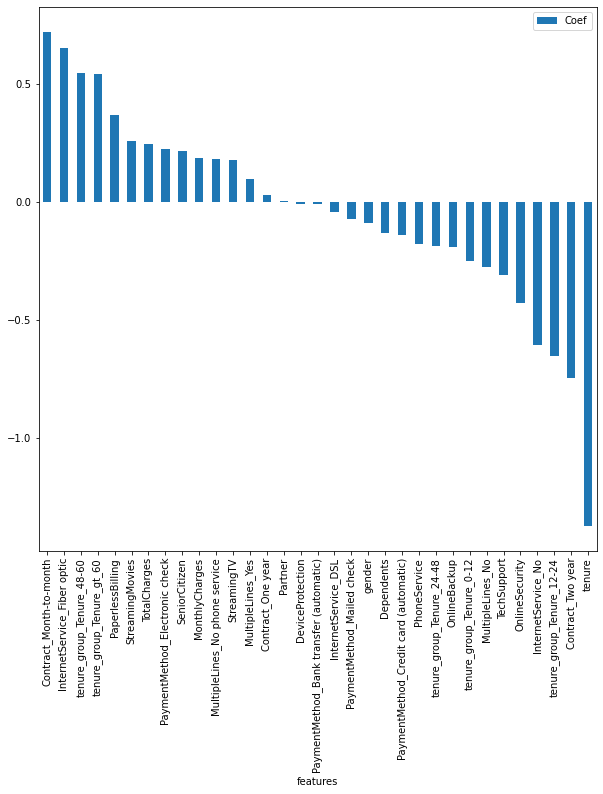

In [81]:
ax = df.plot.bar(x='features', y='Coef', figsize=(10,10))

### Q16. What do you observe?
### Answer 16

- The above bar chart shows the correlation coef. amongst the features of telcom dataset based on the Logistic Regression Model.
- High coefficient indicates that the feature has good predictive power on Churn prediction value, conract_Month_to_month, internetservice_fibre optic,tenure_grup_tenure_48_60 and tenure_grup_gt_60 have the highest impact.
- Low coefficient value indicates that the feature has less predictive power on target value. 
- Negative coefficient features would affect the traget value inversely.
- It is similar to correlation coefficient heat map however have been predicted by the model. The coefficients value ranges from 1 to -1, where Contract_Month-to-Month being the most positively correlated variable with 0.72 Coef and tenure being the most negatively correlated variable with -1.37 Coef.

## Feature Seclection/Feature Engineering

In [82]:
from sklearn.feature_selection import RFE 
classifier = LogisticRegression()
rfe = RFE(classifier, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

In [83]:
print(rfe.support_)

[False False False False False  True False False False False  True False
  True False False False  True  True  True False  True False False False
 False False False False  True  True  True False False]


In [84]:
X_train.columns[rfe.support_]

Index(['OnlineSecurity', 'StreamingMovies', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_Two year',
       'tenure_group_Tenure_48-60', 'tenure_group_Tenure_gt_60', 'tenure'],
      dtype='object')

In [85]:
rfe.ranking_

array([18,  7, 24, 14, 15,  1, 11, 23,  5,  6,  1,  3,  1, 12, 16, 20,  1,
        1,  1, 21,  1, 22, 17,  4, 19,  8,  2,  9,  1,  1,  1, 13, 10])

In [86]:
# Build the model again after Feature Selection
classifier = LogisticRegression(random_state = 2)
classifier.fit(X_train[X_train.columns[rfe.support_]], Y_train)


LogisticRegression(random_state=2)

In [87]:
#Evaluating the Results
cm = confusion_matrix(Y_test, y_pred)

print(f"Accuracy Score {accuracy_score(Y_test, y_pred)}")
print(f"Precision Score {precision_score(Y_test, y_pred)}")
print(f"Recall Score {recall_score(Y_test, y_pred)}")
print(f"F1 Score{f1_score(Y_test, y_pred)}")


Accuracy Score 0.732650739476678
Precision Score 0.521551724137931
Recall Score 0.49387755102040815
F1 Score0.5073375262054507


<AxesSubplot:>

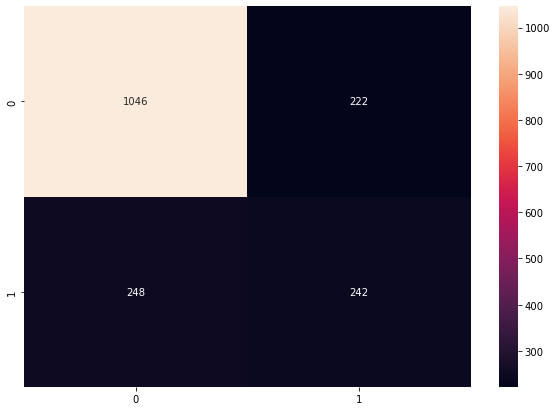

In [88]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, annot = True, fmt ='g')

In [89]:
print("Test Data Accuracy: %.4f" %accuracy_score(Y_test, y_pred))

Test Data Accuracy: 0.7327


In [90]:
#Calculating ROC/AUC the Results
roc_auc_score(Y_test, y_pred)

0.6593993433335479

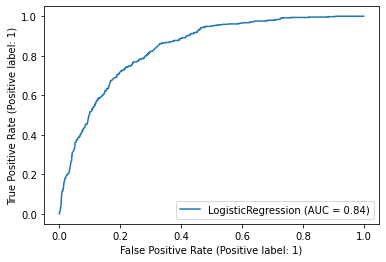

In [91]:
# adding ROC/AUC curve
plot_roc_curve(classifier, X_test[X_test.columns[rfe.support_]], Y_test)

### Q17. Has the model improved after feature selection?
### Answer 17:

The model does not seem to have improved after the feature selection. In fact, the results are now same as decision tree Model. However the only difference is the ROC_AUC Score and AUC curve which is 0.65 and 0.84 respectively. This means that selected features were most contributing features in the previous model too. 

In [92]:
# Subset the coefficents for RFE
df_RFE=pd.concat([pd.DataFrame(X_train.columns[rfe.support_], columns =["features"]), pd.DataFrame(np.transpose(classifier.coef_), columns =["Coef"])], axis = 1)

### Q 18. Build a bar plot similar to the one with all the features
### Answer 18

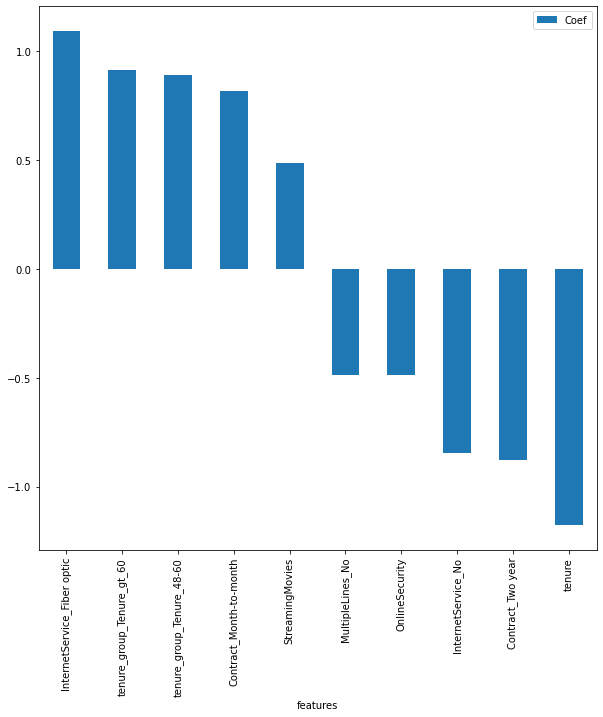

In [93]:
df_RFE = df_RFE.sort_values('Coef', ascending=False)
ax = df_RFE.plot.bar(x='features', y='Coef', figsize=(10,10))


### Q 19. Share your observations. Do you find them different?
### Answer 19

- RFE function removed the least important features, those are the one with very low positive and negative coefficient values.
- The bar plot has the 10 selected features as compared to all the 33 features in previous
- InternetService_Fiber optic replaced Contract_Month-to-month as the top feature with positive correlation coefficient.
- Tenure is still the most negatively corelated feature.
- For better accuracy the model should be resconstructed with all positive correlation coefficients features and dropping all features that have negative correlation coeffcient values.

In [94]:
final_results = pd.concat([Y_test, telcom.customerID], axis =1).dropna()
final_results['predicted_churn'] = y_pred
final_results = final_results[['customerID', 'Churn', 'predicted_churn']].reset_index(drop = True)

### Q 20. Print the final Results
### Answer 20

In [95]:
print(final_results)

      customerID  Churn  predicted_churn
0     3668-QPYBK    1.0                0
1     7795-CFOCW    0.0                1
2     9237-HQITU    1.0                0
3     8091-TTVAX    0.0                0
4     6865-JZNKO    0.0                1
...          ...    ...              ...
1753  2823-LKABH    0.0                1
1754  6894-LFHLY    1.0                0
1755  0639-TSIQW    1.0                0
1756  4801-JZAZL    0.0                0
1757  3186-AJIEK    0.0                0

[1758 rows x 3 columns]


In [96]:
#printed total number of predicted churns and not churnss
final_results['predicted_churn'].value_counts()

0    1294
1     464
Name: predicted_churn, dtype: int64

### Q 21. Provide recommendations based on the feature selection. What should company target for to reduce churn?
### Answer 21

Although the model's accuracy has not improved based on feature selection we have identified the features that are impacting the churn most. Based upon the above bar plot, the top 5 features are
- InternetService_FiberOptic, - tenure_group_Tenure_gt_60, - tenure_group_Tenure_48-60, - Contract_Month-to-Month and - Streaming Movies

- Hence the company should target and build strategies based on these features according to their ranks for example initiate the service specific feedback surveys and further study in relation to the customers who have fiber optic service, who have been with company for more than 4 years, customers who have streaming movies service. 
- They need to develop a better binding offer for people who are potentially buying month to month contract, perhaps review with them every quarter how they are doing and what are their future plans, the survey and calls should be to understand their needs and expectations. 
- Post purchase rapport building is very essential. 
- They could possibly reduce the churn rate by offering free tech support to seniors.
- Company could provide more customer deals and promotions/discounts for the customers whose tenure group is more than 2 years.
- Company could evaluate and study customers who need support with online security, internet services, backups etc. and offer those as rewards or bundled packages.
- Engagement with customers is very important to assess thier understanding of features provided, company should dig to find out if their is an element of overselling in realtion to some features where month;y charges are high, people could be given upgrade options when their monthly charges are very high or go beyond a threshhold. 
- Finding ways to educate the customers regarding offers and the benefits from the company.

For the model We should select the accurate features to predict correct accuracy.

### Practice Q22. Can you Add SVM model to this dataset and perform the same steps and check test data accuracy?

In [97]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm_model = SVC()
svm_model.fit(X_train,Y_train)
svm_y_pred=svm_model.predict(X_test)
svm_acc=accuracy_score(Y_test, svm_y_pred)
print("Accuracy of the model is: %.6f" %svm_acc)

Accuracy of the model is: 0.795791


In [98]:
#Evaluating the Results
svm_cm = confusion_matrix(Y_test, svm_y_pred)

print(f"Accuracy Score {svm_acc}")
print(f"Precision Score {precision_score(Y_test, svm_y_pred)}")
print(f"Recall Score {recall_score(Y_test, svm_y_pred)}")
print(f"F1 Score{f1_score(Y_test, svm_y_pred)}")

Accuracy Score 0.7957906712172924
Precision Score 0.7066246056782335
Recall Score 0.45714285714285713
F1 Score0.5551425030978935


SVM Model, Test Data Accuracy: 0.7958


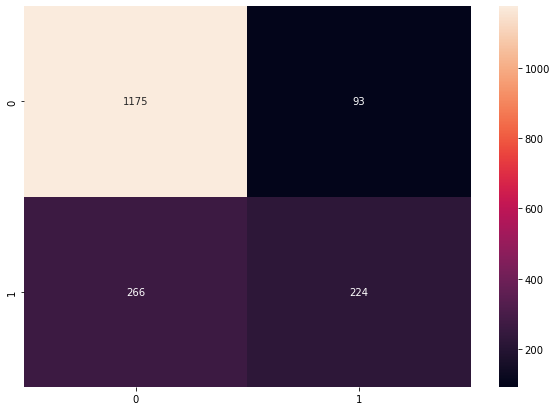

In [99]:
s_cm = pd.DataFrame(svm_cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(s_cm, annot = True, fmt ='g')
print("SVM Model, Test Data Accuracy: %.4f" %svm_acc)

In [100]:
#Calculating ROC/AUC the Results
roc_auc_score(Y_test, svm_y_pred)

0.6918995042812077

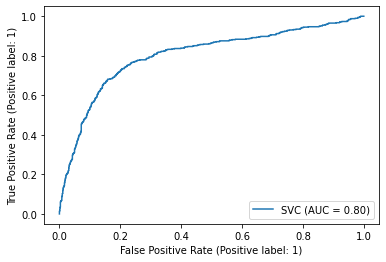

In [101]:

# adding ROC/AUC curve
plot_roc_curve(svm_model, X_test, Y_test)

- Accuracy score:  .7957 
- Precision score: .70 
- Recall score:    0.45 
- F1 score:        0.55
- ROC/AUC score : 0.69 AUC curve 0.80 
- The results are similar to the Logistic Regression Model without feature selection. 
- Logistic regression model had predicted 1151 True positives(TP) and 259 True negatives(TN), Decision Tree 1046 TP and 242 TN, SVM Model has 1175 TP and 224 TN.
- Logistic regression model had predicted 231 False positives(FP) and 117 False negatives(FN), Decision Tree 248 FP and 222 FN, SVM Model has 266 FP and 93 FN.